<a href="https://colab.research.google.com/github/heewoonjeong/AI8_Study/blob/main/%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 훈련 데이터셋 테스트 데이터셋 reuters.load_data() 함수이용해 기사 불러오기 
# test_split = 20%만 테스트셋으로 지정
# num_words 옵션은 무엇을 의미하는지 알아보자 
# num_words 1000 의 의미는 빈도가 1~1000에 해당하는 단어만 선택해서 불러오는것 
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words= 1000,test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
# np.max() 함수로 y_train 의 종류를 구하니 카테고리 46으로 구분되어있음을 알수있엇다.
# 이중에 학습용과 테스트 용 기사를 확인 
# 딥러닝은 단어가 아닌 숫자로 변환후 학습 할수있다
category = np.max(y_train) +1
print(category, '카테고리')
print(len(X_train),'학습용 뉴스 기사')
print(len(X_test),'테스트 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
# 기사의 단어수가 제각각 다르므로 이를 동일하게 맞추어야 한다는것 이때 다음과 같은 데이터 전처리 함수sequence()를 사용합니다 
# maxlen 단어수를 100개로 맞추라는 의미 
X_train = sequence.pad_sequences(X_train, maxlen =100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [ ]:
# 원핫 인코딩 처리 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# 모델의구조 설정 
# Embedding층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음층이 알수 있는 형태로 변환(불러온 단어의수, 기사당 단어수)
# LSTM=  RNN에서 기억 값에 대한 가중치를 제어(기사당 언어수,기타 옵션) 활성 함수로 tanh 사용 
# 카테고리 숫자대로 Dense 지정 
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

#모델 실행 옵션 정함 
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy']) 
#조기중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 학습 실행 
history = model.fit(X_train, y_train, batch_size=20,epochs= 200,
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 12s 10ms/step - loss: 2.2310 - accuracy: 0.4297 - val_loss: 1.8289 - val_accuracy: 0.5334
Epoch 2/200
450/450 [==============================] - 4s 9ms/step - loss: 1.7650 - accuracy: 0.5488 - val_loss: 1.6761 - val_accuracy: 0.5739
Epoch 3/200
450/450 [==============================] - 4s 9ms/step - loss: 1.6346 - accuracy: 0.5831 - val_loss: 1.6561 - val_accuracy: 0.5859
Epoch 4/200
450/450 [==============================] - 4s 9ms/step - loss: 1.4649 - accuracy: 0.6239 - val_loss: 1.4321 - val_accuracy: 0.6358
Epoch 5/200
450/450 [==============================] - 4s 9ms/step - loss: 1.3219 - accuracy: 0.6592 - val_loss: 1.3381 - val_accuracy: 0.6638
Epoch 6/200
450/450 [==============================] - 4s 10ms/step - loss: 1.2223 - accuracy: 0.6867 - val_loss: 1.3002 - val_accuracy: 0.6736
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.1321 - accuracy: 0.7118 - val_loss: 1.2391 - val_accuracy: 0.6

In [ ]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))
# 에ㅗ크에서 학습 자동중단 

71/71 [==============================] - 0s 5ms/step - loss: 1.2723 - accuracy: 0.7155

 Test Accuracy: 0.7155


In [ ]:
# 검증셋과 학습셋 오차 저장 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

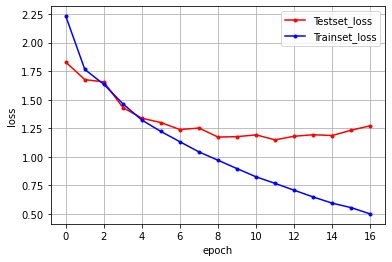

In [ ]:
#그래프 표현 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker= '.',c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()